In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
alumnos_path = './data/Alumnos.csv'
alumnos_df = pd.read_csv(alumnos_path, encoding='utf-8', delimiter=';')
alumnos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37861 entries, 0 to 37860
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APELLIDOS Y NOMBRES           37861 non-null  object 
 1   CÓDIGO ALUMNO                 37861 non-null  object 
 2   FACULTAD                      37861 non-null  object 
 3   TIPO DOC.                     37861 non-null  object 
 4   DOC. IDENTIDAD                37860 non-null  object 
 5   CORREO INSTITUCIONAL          37861 non-null  object 
 6   CRÉDITOS APROBADOS            37861 non-null  float64
 7   UBICACIÓN RANKING FACULTAD    37861 non-null  float64
 8   PERTENECE AL TERCIO SUPERIOR  37861 non-null  object 
 9   PAÍS NACIMIENTO               37861 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.9+ MB


In [3]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

C:\Users\Jose\AppData\Local\Temp\ipykernel_16592\2304468855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FACULTAD', order=df['FACULTAD'].value_counts().index, palette="viridis")


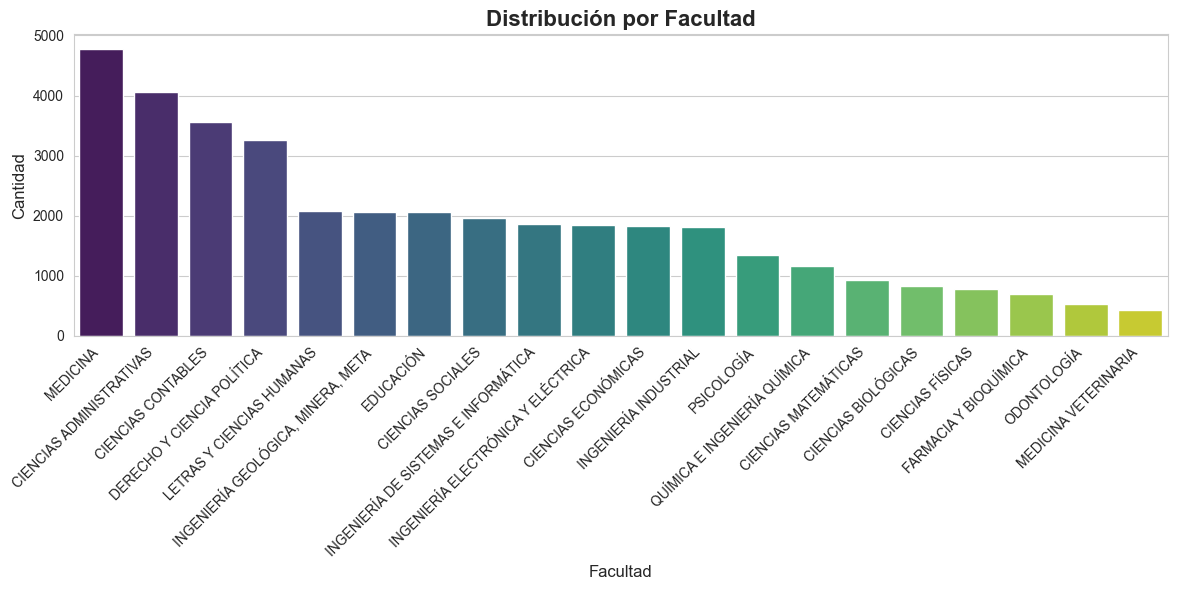

In [4]:
def visualizar_datos(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='FACULTAD', order=df['FACULTAD'].value_counts().index, palette="viridis")
    plt.title('Distribución por Facultad', fontsize=16, fontweight='bold')
    plt.xlabel('Facultad', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

visualizar_datos(alumnos_df)

C:\Users\Jose\AppData\Local\Temp\ipykernel_16592\4044311964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PERTENECE AL TERCIO SUPERIOR',


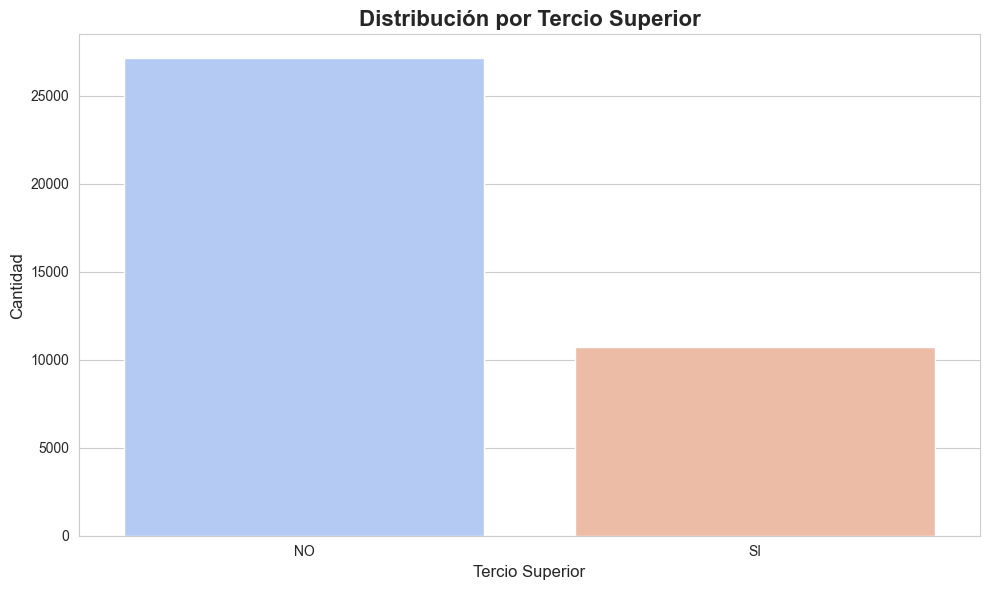

In [5]:
def visualizar_por_tercio_superior(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='PERTENECE AL TERCIO SUPERIOR', 
                  order=df['PERTENECE AL TERCIO SUPERIOR'].value_counts().index, 
                  palette="coolwarm")
    plt.title('Distribución por Tercio Superior', fontsize=16, fontweight='bold')
    plt.xlabel('Tercio Superior', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

visualizar_por_tercio_superior(alumnos_df)

C:\Users\Jose\AppData\Local\Temp\ipykernel_16592\2805694555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PAÍS NACIMIENTO',


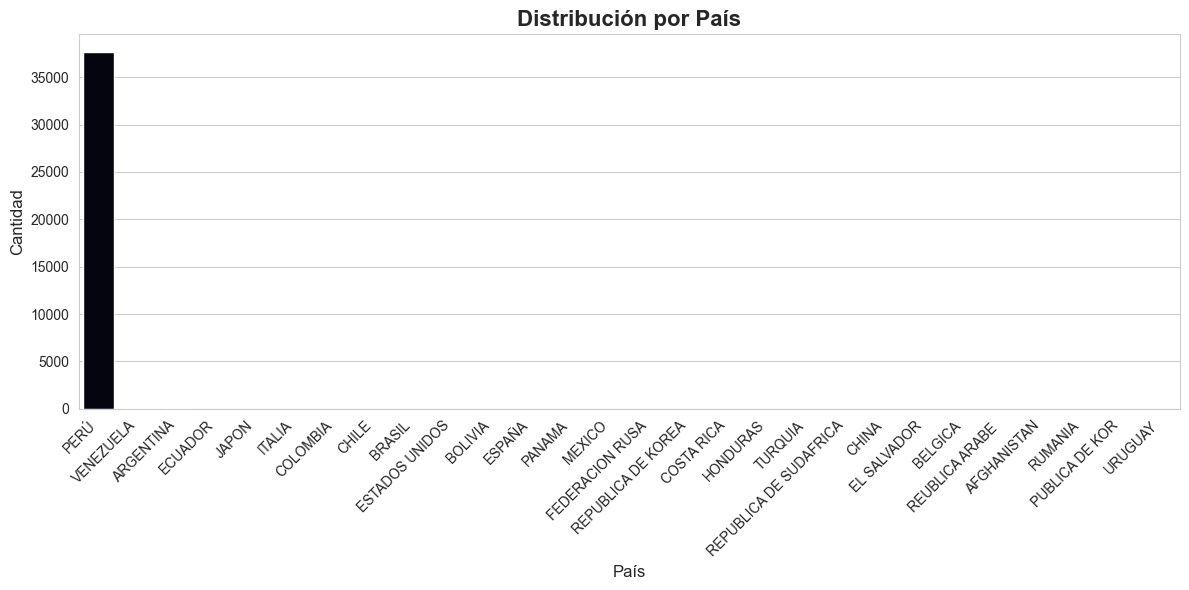

In [6]:
def visualizar_por_pais(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='PAÍS NACIMIENTO', 
                  order=df['PAÍS NACIMIENTO'].value_counts().index, 
                  palette="magma")
    plt.title('Distribución por País', fontsize=16, fontweight='bold')
    plt.xlabel('País', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

visualizar_por_pais(alumnos_df)

C:\Users\Jose\AppData\Local\Temp\ipykernel_16592\3572928269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facultades, x='Cantidad', y='Facultad', palette="cubehelix")


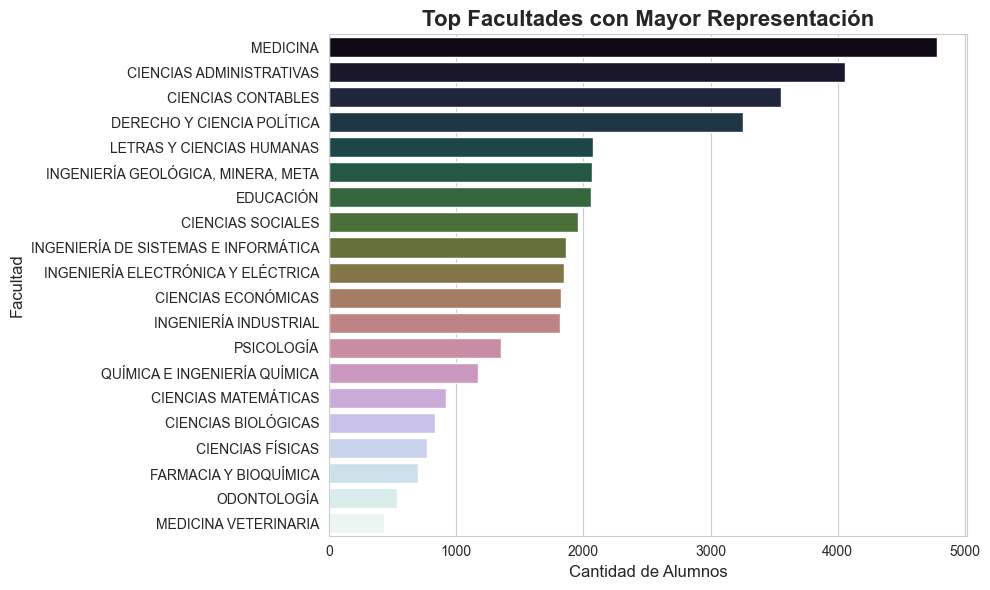

In [7]:
def top_facultades(df):
    facultades = df['FACULTAD'].value_counts().reset_index()
    facultades.columns = ['Facultad', 'Cantidad']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=facultades, x='Cantidad', y='Facultad', palette="cubehelix")
    plt.title('Top Facultades con Mayor Representación', fontsize=16, fontweight='bold')
    plt.xlabel('Cantidad de Alumnos', fontsize=12)
    plt.ylabel('Facultad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

top_facultades(alumnos_df)

In [8]:
alumnos_df

,APELLIDOS Y NOMBRES,CÓDIGO ALUMNO,FACULTAD,TIPO DOC.,DOC. IDENTIDAD,CORREO INSTITUCIONAL,CRÉDITOS APROBADOS,UBICACIÓN RANKING FACULTAD,PERTENECE AL TERCIO SUPERIOR,PAÍS NACIMIENTO
0,ABAD CONDORI DANITZA ROCIO,24010364,MEDICINA,DNI,71311644,danitza.abad@unmsm.edu.pe,23.0,2914.0,SI,PERÚ
1,ABAL DE LA CRUZ WILDER LUCIO,24017426,MEDICINA,DNI,7431430,wilder.abal@unmsm.edu.pe,18.0,700.0,NO,PERÚ
2,ABANTO AYALA LARISSA TAMARA,23010455,MEDICINA,DNI,74749785,larissa.abanto@unmsm.edu.pe,70.0,2904.0,SI,PERÚ
3,ABANTO CHAVEZ EILEEN SANDY,23010262,MEDICINA,DNI,60722225,eileen.abanto@unmsm.edu.pe,71.0,3199.0,SI,PERÚ
4,ABANTO FORTUNA ANGEL LEANDRO,23010263,MEDICINA,DNI,63352583,angel.abantof@unmsm.edu.pe,50.0,48.0,NO,ESPAÑA
...,...,...,...,...,...,...,...,...,...,...
37856,ZEVALLOS LOPEZ JHOSUE MAURICIO,21100065,CIENCIAS BIOLÓGICAS,DNI,70699100,jhosue.zevallos@unmsm.edu.pe,157.0,497.0,NO,PERÚ
37857,ZEVALLOS VÁSQUEZ GIANELLA GERALDINE,15100036,CIENCIAS BIOLÓGICAS,DNI,75171163,gianella.zevallos@unmsm.edu.pe,184.0,126.0,NO,PERÚ
37858,ZOLFI RODRIGUEZ FIORELLA SOFIA,20100046,CIENCIAS BIOLÓGICAS,DNI,76850729,fiorella.zolfi@unmsm.edu.pe,194.0,598.0,SI,PERÚ
37859,ZUÑIGA HUERTAS KIARA NAYSHA,20100040,CIENCIAS BIOLÓGICAS,DNI,74583291,kiara.zuniga@unmsm.edu.pe,197.0,246.0,NO,PERÚ


In [9]:
# Crear un nuevo DataFrame para codificación
alumnos_codificados_df = alumnos_df.copy()# Codificación de datos categóricos

# Codificación de datos categóricos
le_facultad = LabelEncoder()
le_tercio = LabelEncoder()

alumnos_codificados_df['FACULTAD'] = le_facultad.fit_transform(alumnos_df['FACULTAD'])
alumnos_codificados_df['PERTENECE AL TERCIO SUPERIOR'] = le_tercio.fit_transform(alumnos_df['PERTENECE AL TERCIO SUPERIOR'])

In [10]:
# Separar características (X) y etiqueta (y)
X = alumnos_codificados_df[['FACULTAD', 'CRÉDITOS APROBADOS', 'UBICACIÓN RANKING FACULTAD']]
y = alumnos_codificados_df['PERTENECE AL TERCIO SUPERIOR']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos a entrenar
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(random_state=42),
    "Máquina de Soporte Vectorial (SVM)": SVC(random_state=42)
}

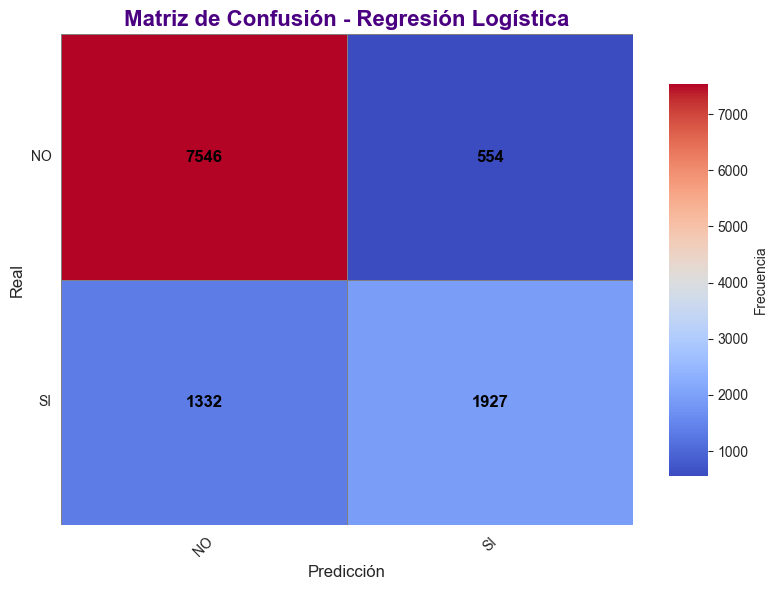

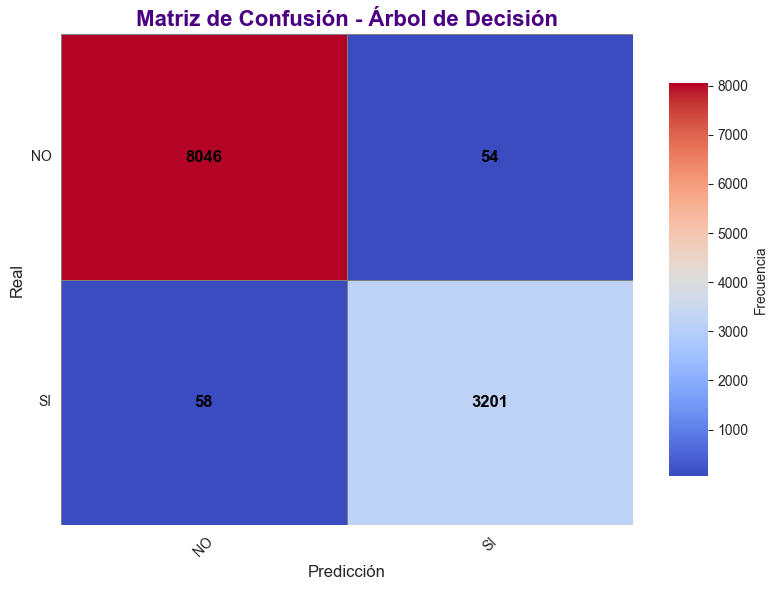

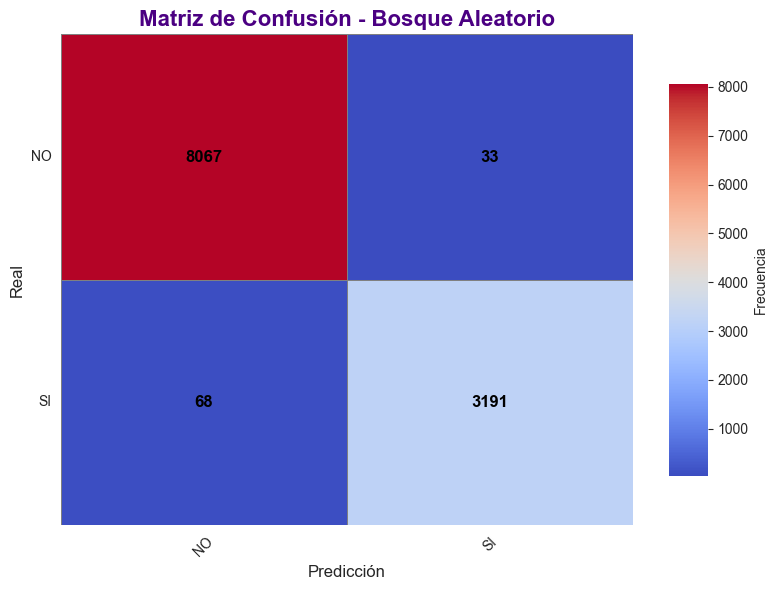

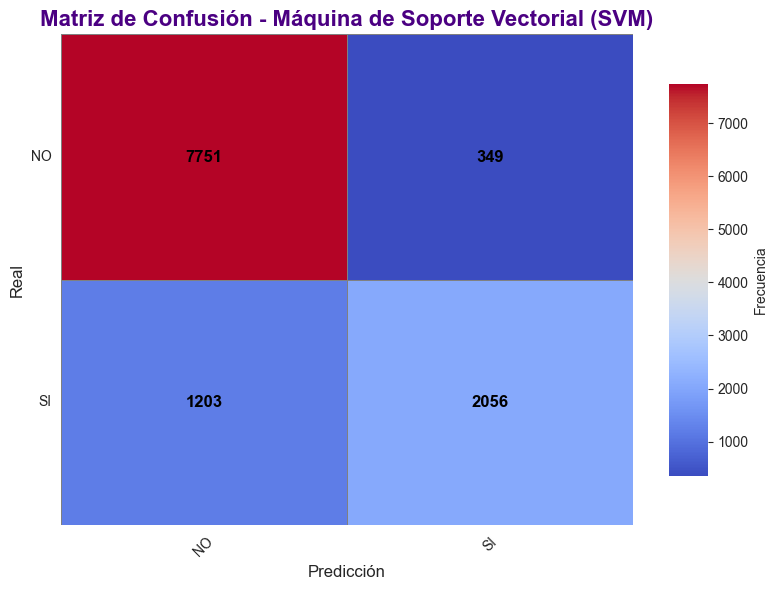

In [11]:
# Entrenar y evaluar modelos
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Guardar resultados
    resultados[nombre] = {
        "Exactitud (Accuracy)": accuracy,
        "Precisión": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Reporte de Clasificación": classification_report(y_test, y_pred, output_dict=True),
        "Matriz de Confusión": confusion_matrix(y_test, y_pred)
    }

metricas_df = pd.DataFrame({
    nombre: {
        "Exactitud (Accuracy)": datos["Exactitud (Accuracy)"],
        "Precisión": datos["Precisión"],
        "Recall": datos["Recall"],
        "F1-Score": datos["F1-Score"]
    }
    for nombre, datos in resultados.items()
}).T

# Visualización mejorada de matrices de confusión
for nombre, datos in resultados.items():
    matriz = datos["Matriz de Confusión"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        matriz,
        annot=True,           # Mostrar valores
        fmt='d',              # Formato de enteros
        cmap='coolwarm',      # Nueva paleta de colores
        annot_kws={"size": 12, "weight": "bold", "color": "black"},  # Personalización de anotaciones
        xticklabels=le_tercio.classes_, 
        yticklabels=le_tercio.classes_,
        linewidths=0.5,       # Líneas de separación
        linecolor='gray',     # Color de las líneas
        cbar_kws={"shrink": 0.8, "aspect": 10, "label": "Frecuencia"}  # Barra de color mejorada
    )
    plt.title(f"Matriz de Confusión - {nombre}", fontsize=16, fontweight='bold', color="#4B0082")
    plt.xlabel("Predicción", fontsize=12)
    plt.ylabel("Real", fontsize=12)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=0)
    plt.tight_layout()
    plt.show()

In [12]:
metricas_df

,Exactitud (Accuracy),Precisión,Recall,F1-Score
Regresión Logística,0.833964,0.828946,0.833964,0.826516
Árbol de Decisión,0.990140,0.990137,0.990140,0.990138
Bosque Aleatorio,0.991108,0.991103,0.991108,0.991094
Máquina de Soporte Vectorial (SVM),0.863368,0.862559,0.863368,0.856489


In [ ]:
def predecir_con_modelos(modelos, alumnos_df, le_facultad, columnas):
    """
    Pedir datos al usuario, codificarlos y realizar predicciones con todos los modelos.
    """
    print("\nIngrese los datos para realizar una predicción:")

    # Pedir entrada al usuario usando los datos originales
    facultad = input(f"Facultad (opciones: {list(alumnos_df['FACULTAD'].unique())}): ")
    creditos_aprobados = float(input("Créditos Aprobados (número): "))
    ubicacion_ranking = float(input("Ubicación Ranking Facultad: "))

    # Validar si las entradas están dentro de los valores permitidos
    if facultad not in alumnos_df['FACULTAD'].values:
        print("\nFacultad no válida. Asegúrese de ingresar un valor correcto.")
        return

    # Codificar las entradas del usuario
    facultad_codificada = le_facultad.transform([facultad])[0]

    # Crear DataFrame de entrada codificada
    entrada_codificada = pd.DataFrame(
        [[facultad_codificada, creditos_aprobados, ubicacion_ranking]],
        columns=columnas
    )

    # Predecir con cada modelo
    print("\nPredicciones con cada modelo:")
    for nombre, modelo in modelos.items():
        prediccion_codificada = modelo.predict(entrada_codificada)
        print(f"Modelo: {nombre} -> Predicción: {'Sí pertenece' if prediccion_codificada[0] else 'No pertenece'}")

predecir_con_modelos(modelos, alumnos_df, le_facultad, ['FACULTAD', 'CRÉDITOS APROBADOS', 'UBICACIÓN RANKING FACULTAD'])


Ingrese los datos para realizar una predicción:

Predicciones con cada modelo:
Modelo: Regresión Logística -> Predicción: Sí pertenece
Modelo: Árbol de Decisión -> Predicción: Sí pertenece
Modelo: Bosque Aleatorio -> Predicción: Sí pertenece
Modelo: Máquina de Soporte Vectorial (SVM) -> Predicción: Sí pertenece


c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
